# STEP 00. SETUP
- reference : https://www.kaggle.com/competitions/body-morphometry-chest/data

In [1]:
import numpy as np
from PIL import Image

In [2]:
import numpy as np
import pydicom

def transform_to_hu(medical_image, image):
    hu_image = image * medical_image.RescaleSlope + medical_image.RescaleIntercept
    hu_image[hu_image < -1024] = -1024
    return hu_image

def apply_window(image, window_center, window_width):
    window_image = image.copy()
    image_min = window_center - (window_width / 2)
    image_max = window_center + (window_width / 2)
    window_image[window_image < image_min] = image_min
    window_image[window_image > image_max] = image_max
    return window_image

def resize_normalize(image):
    image = np.array(image, dtype=np.float64)
    image -= np.min(image)
    image /= np.max(image)
    return image

def read_dicom(path, window_width, window_level):
    image_medical = pydicom.dcmread(path)
    image_data = image_medical.pixel_array

    image_hu = transform_to_hu(image_medical, image_data)
    image_window = apply_window(image_hu.copy(), window_level, window_width)
    image_window_norm = resize_normalize(image_window)

    image_window_norm = np.expand_dims(image_window_norm, axis=2)   # (512, 512, 1)
    image_ths = np.concatenate([image_window_norm, image_window_norm, image_window_norm], axis=2)   # (512, 512, 3)
    return image_ths

In [3]:
from glob import glob

dcm_list = glob('./samples/train/dcm/*')
dcm_list.sort()
len(dcm_list)

100

In [29]:
dcm_list[10]

'./samples/train/dcm/case011.dcm'

In [20]:
target = dcm_list[10]
a = pydicom.dcmread(target)
a

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 214
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.4.83844.30000020122818575655200030822
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002, 0013) Implementation Version Name         SH: 'fo-dicom 4.0.4'
(0002, 0016) Source Application Entity Title     AE: 'AN_CTAWP83844_U'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.

In [27]:
b = a.pixel_array
type(b), np.max(b), np.min(b), b.shape

(numpy.ndarray, 2308, 0, (512, 512))

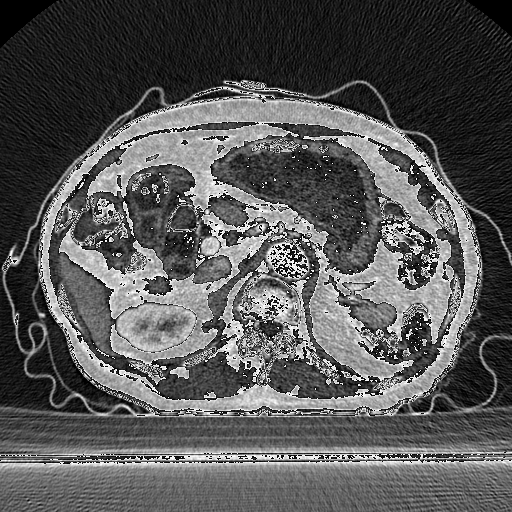

In [28]:
Image.fromarray(b.astype('uint8'))

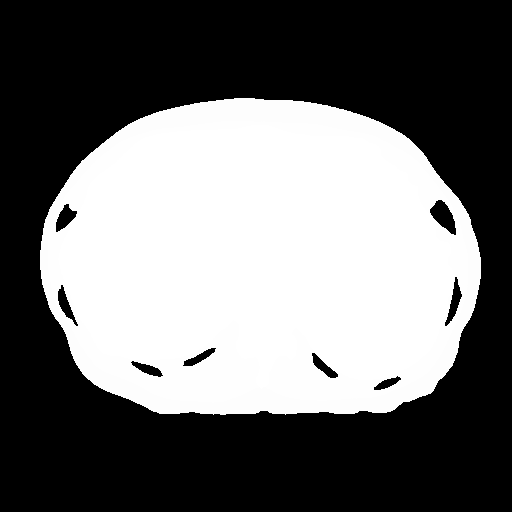

In [45]:
img = np.array(Image.open("./samples/train/label/case011.png"))
Image.fromarray(img.astype('uint8')*255)

In [14]:

A = read_dicom(path=target, window_width=512, window_level=512)
type(A), np.max(A), np.min(A), A.shape

(numpy.ndarray, 1.0, 0.0, (512, 512, 3))

In [67]:
!pip install matplotlib

     |████████████████████████████████| 9.4 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 93.5 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 99.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 105.0 MB/s eta 0:00:01


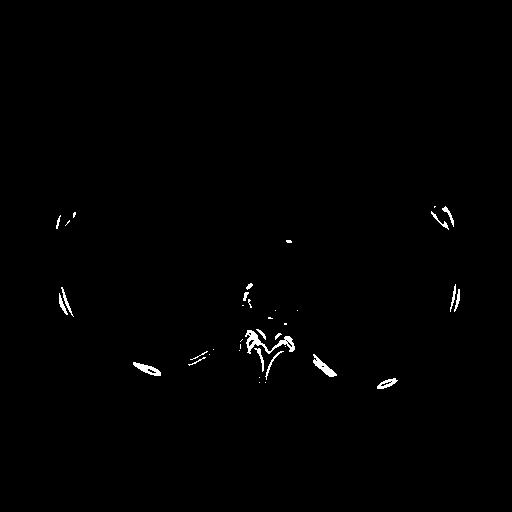

In [79]:
sample = read_dicom(path=target, window_width=512, window_level=100)
# sample = cv2.erode(sample, filter, iterations=1)
# sample = cv2.dilate(sample, filter, iterations=1)
Image.fromarray(sample.astype('uint8')*255).show()

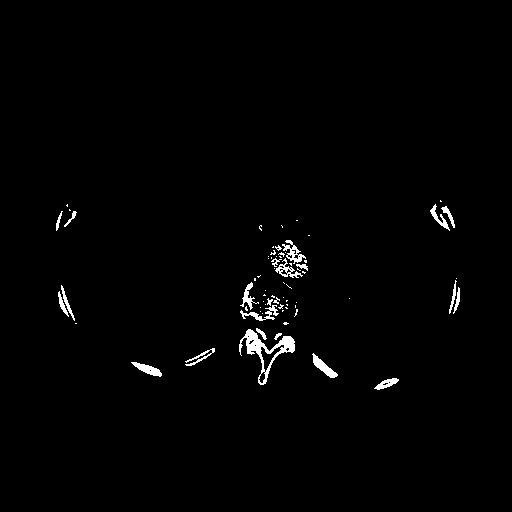

In [85]:
sample = read_dicom(path=target, window_width=512, window_level=0)
# sample = cv2.erode(sample, filter, iterations=1)
# sample = cv2.dilate(sample, filter, iterations=1)
Image.fromarray(sample.astype('uint8')*255).show()

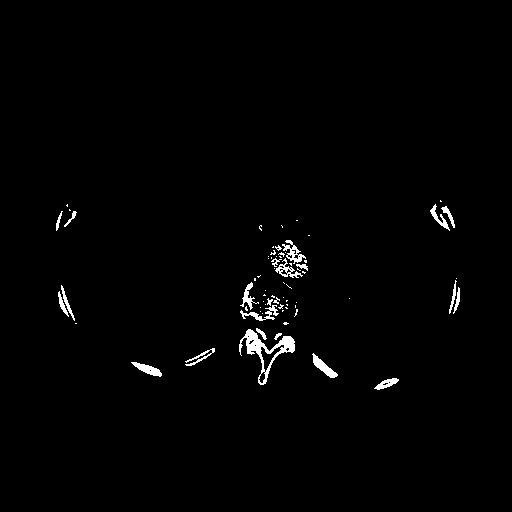

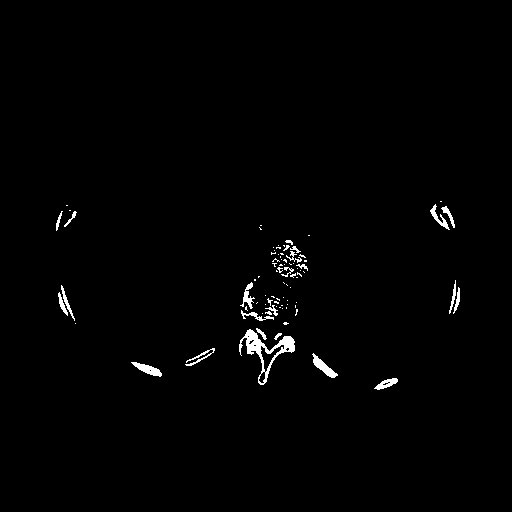

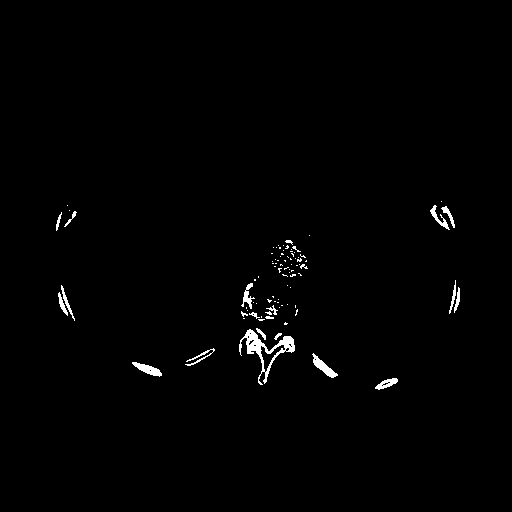

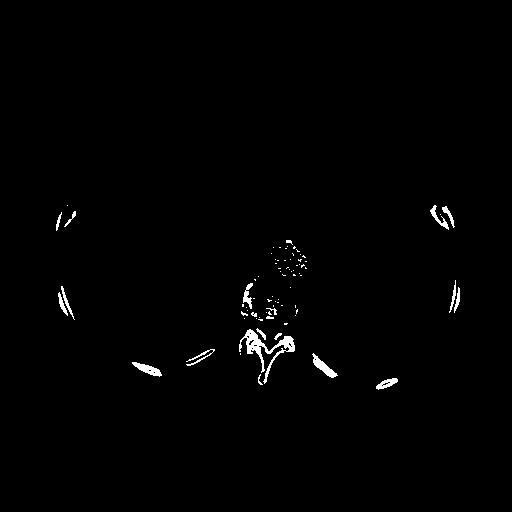

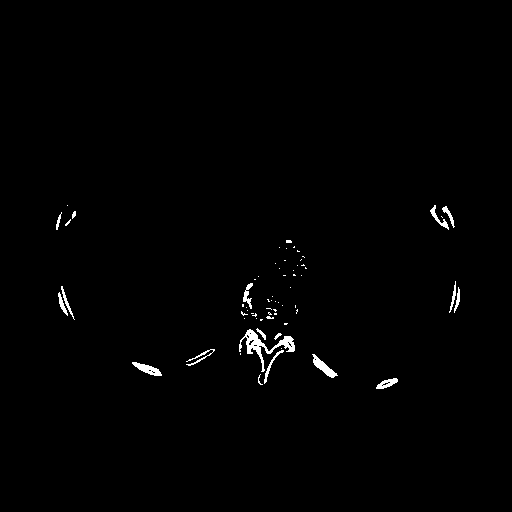

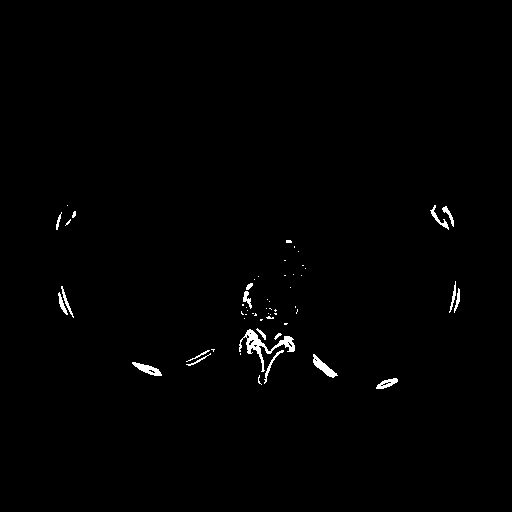

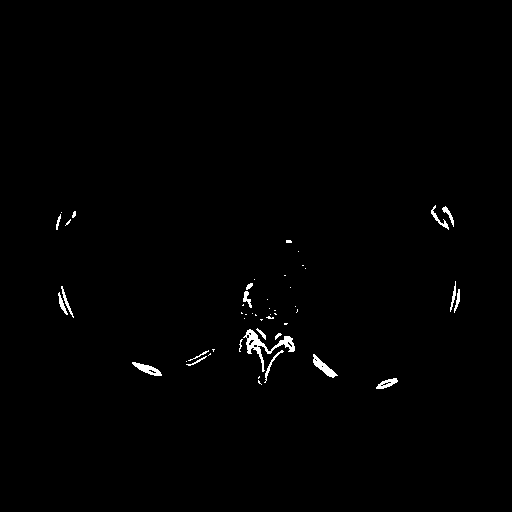

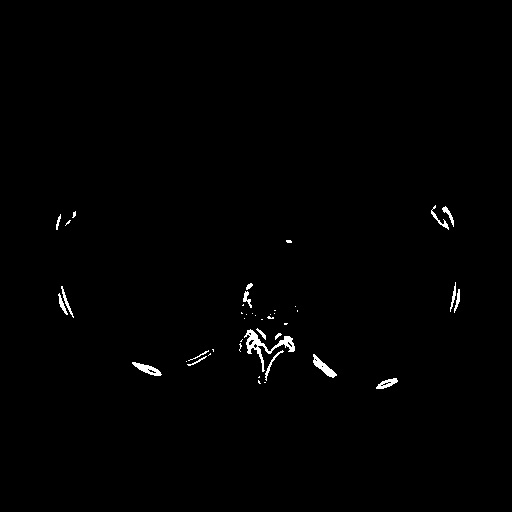

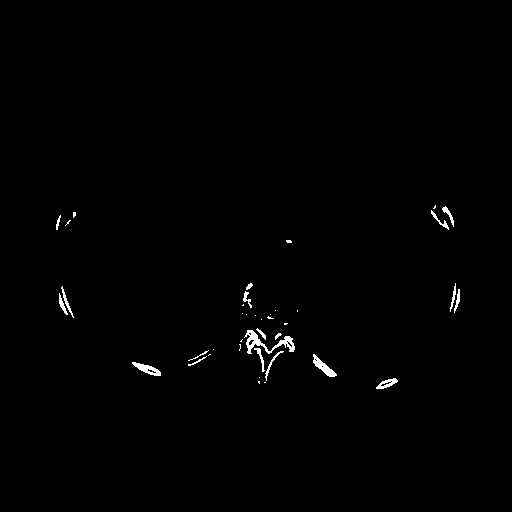

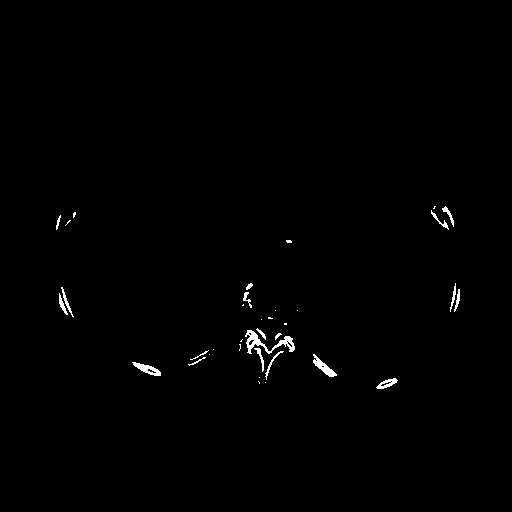

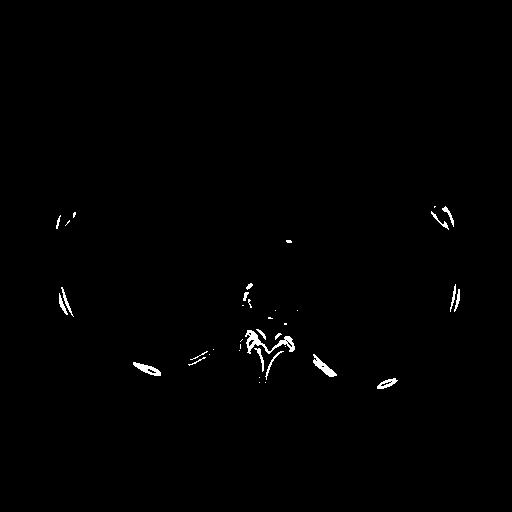

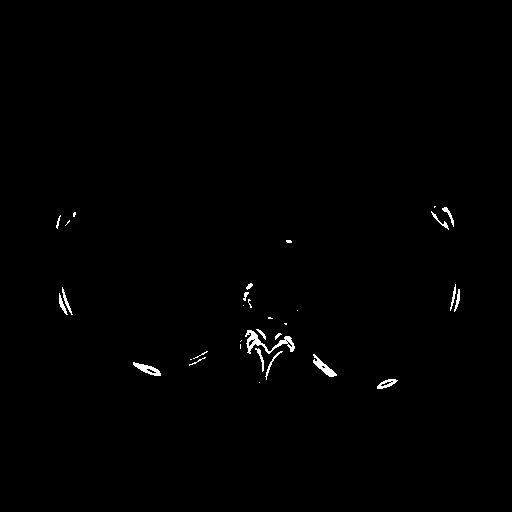

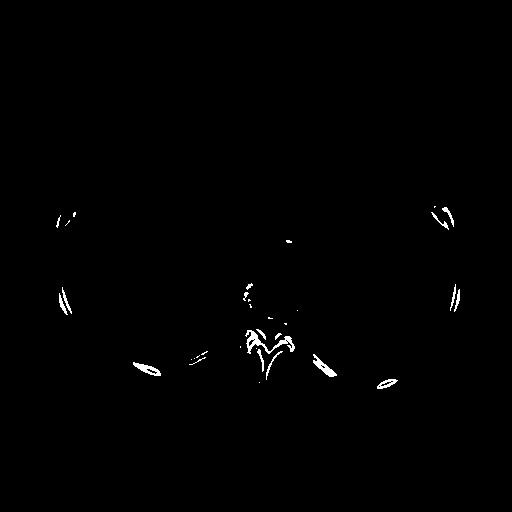

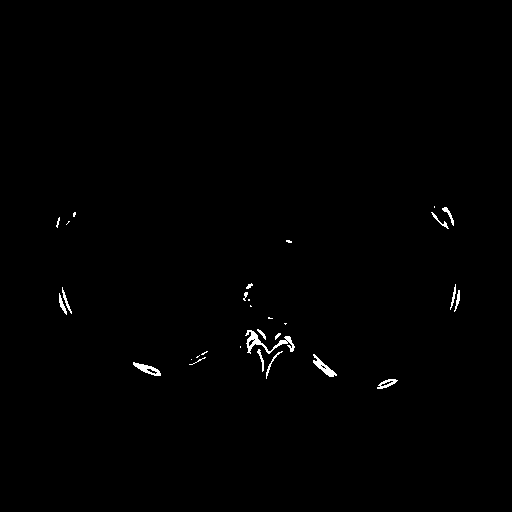

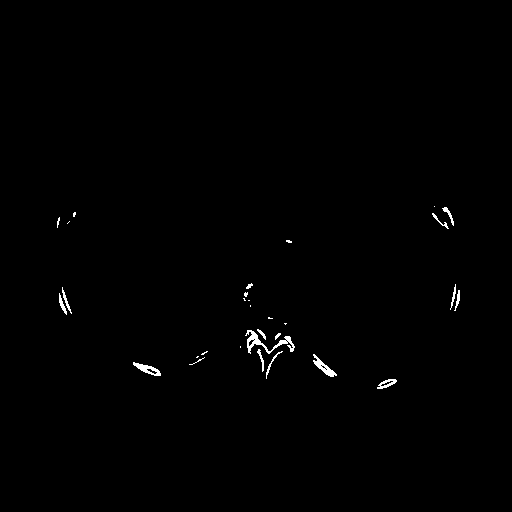

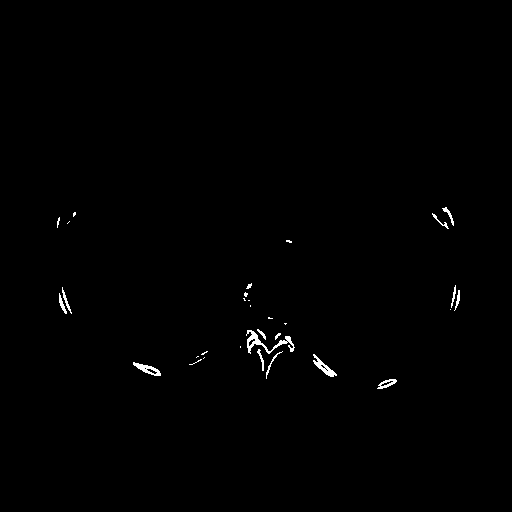

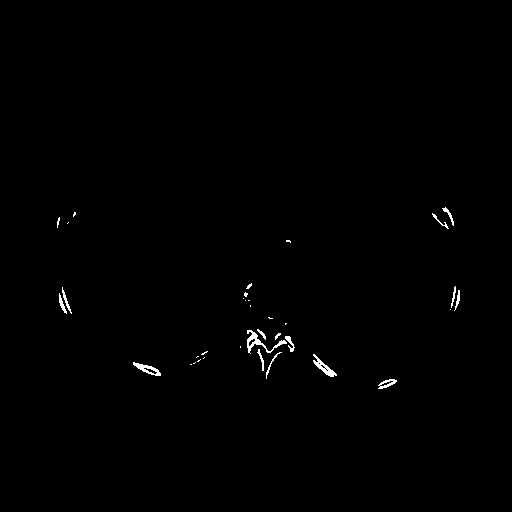

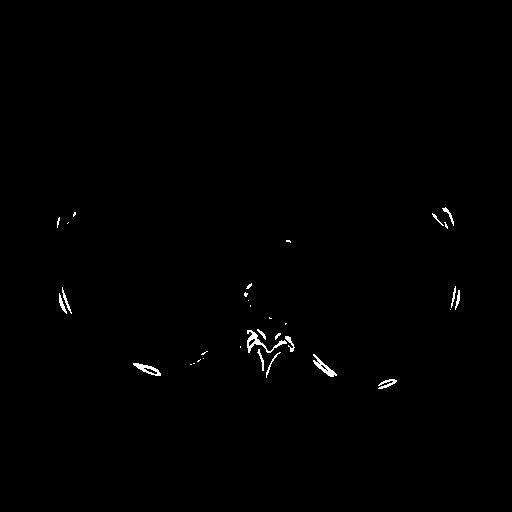

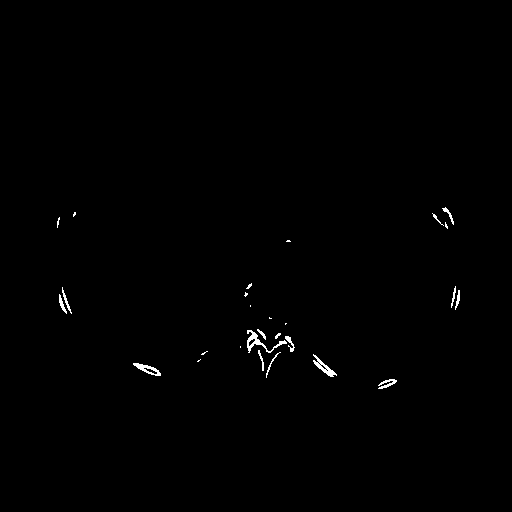

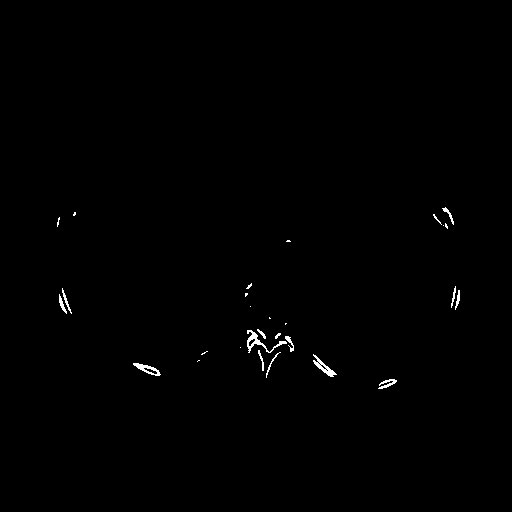

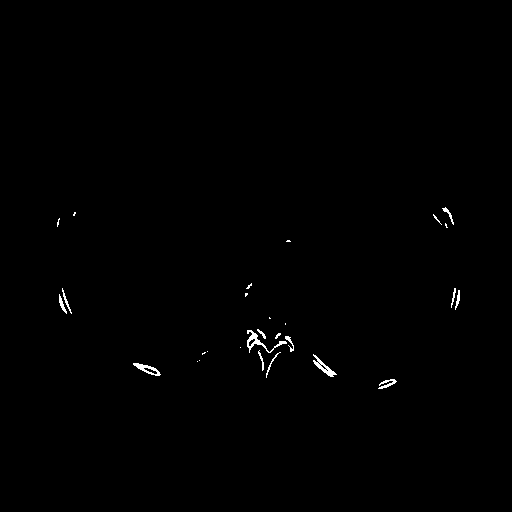

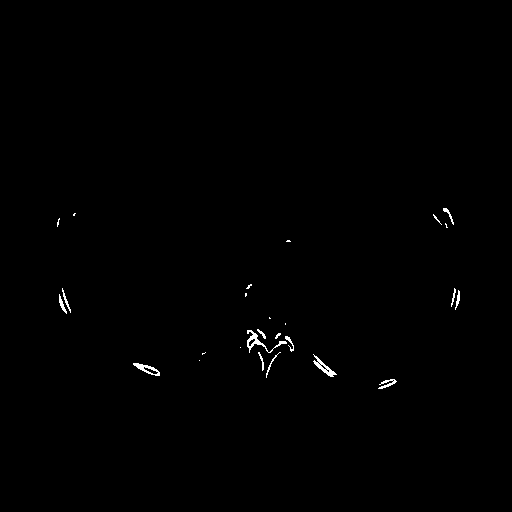

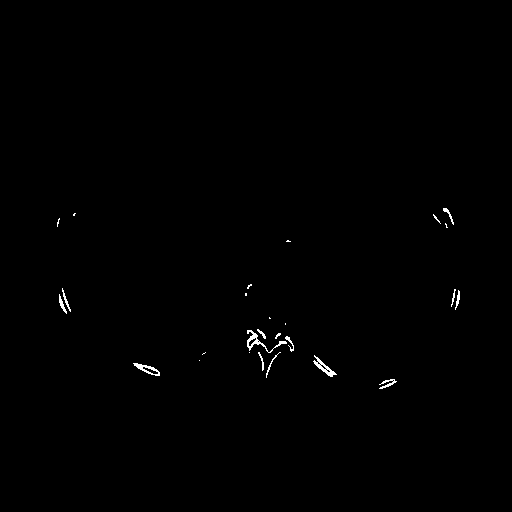

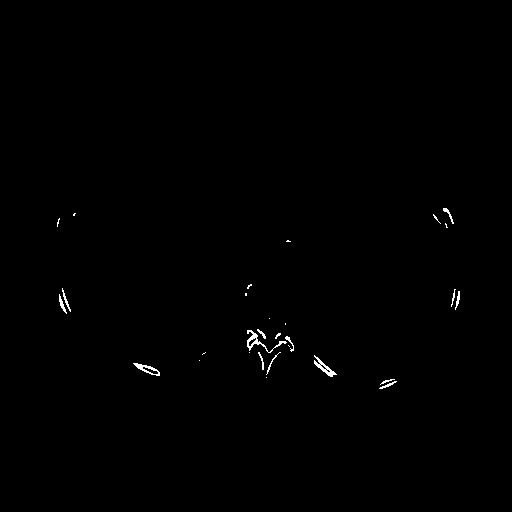

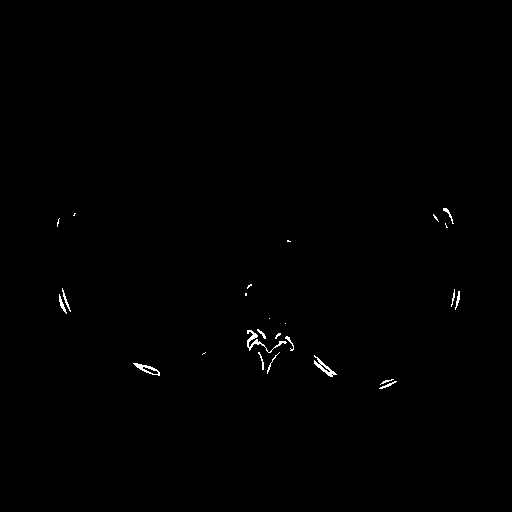

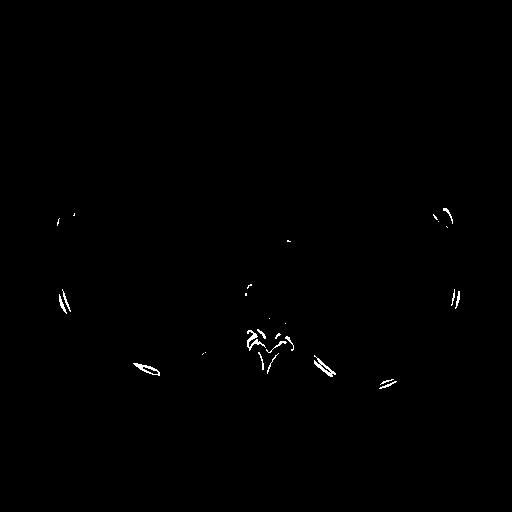

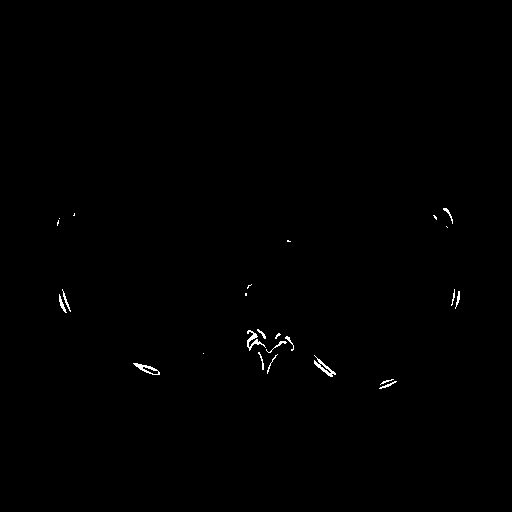

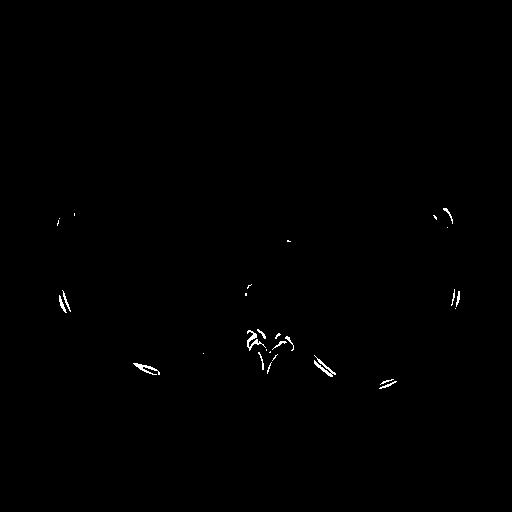

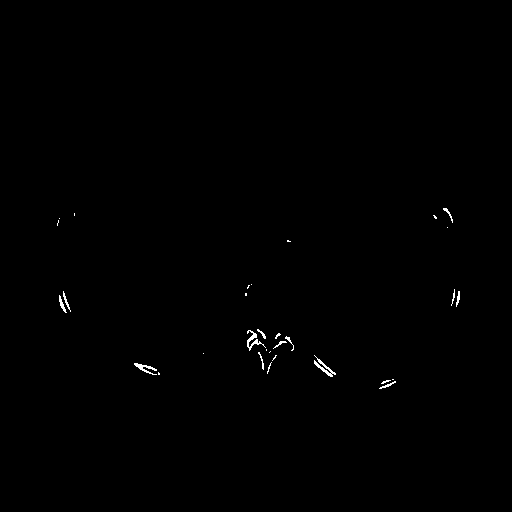

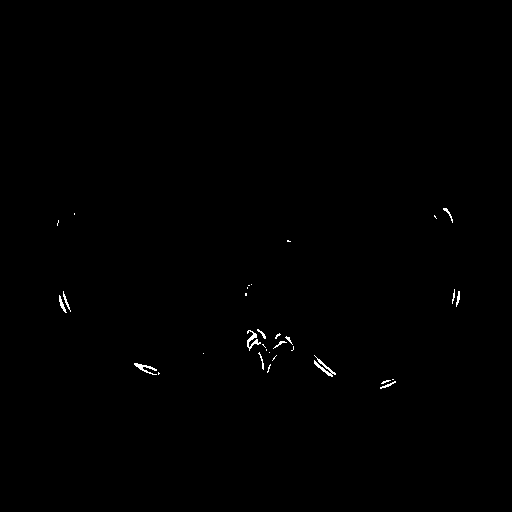

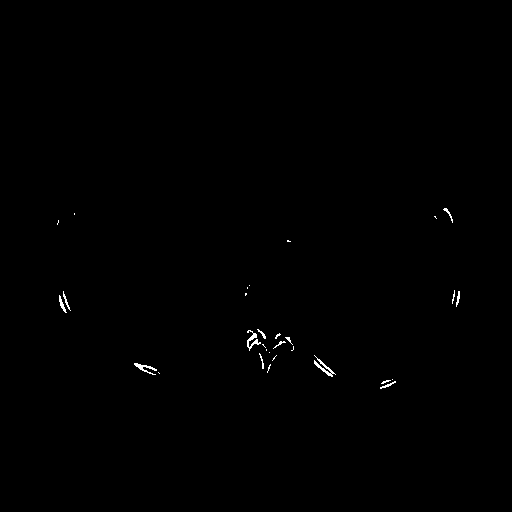

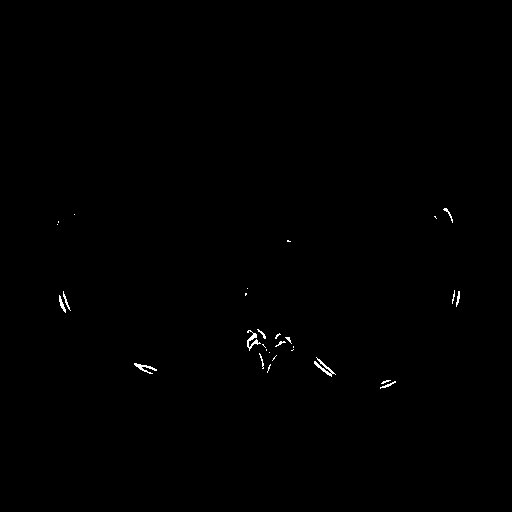

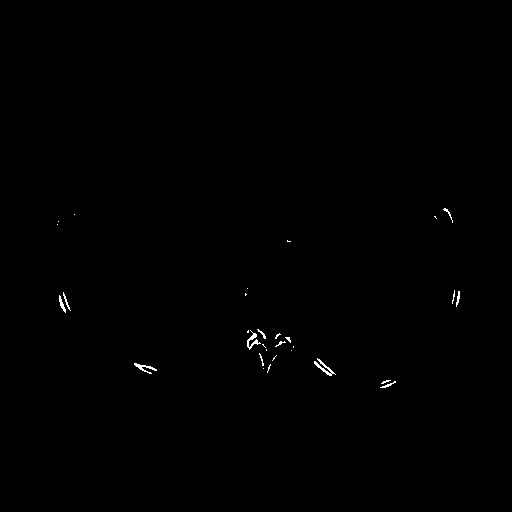

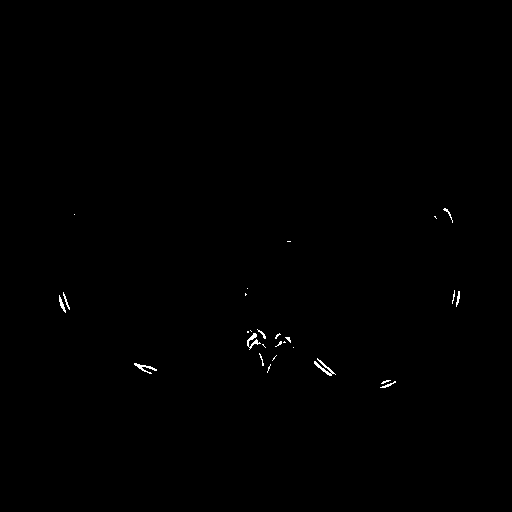

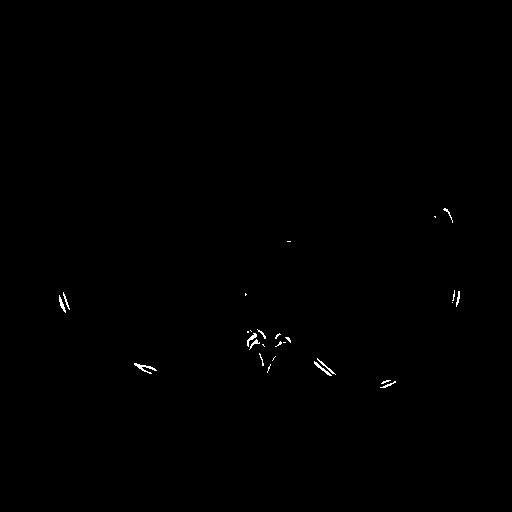

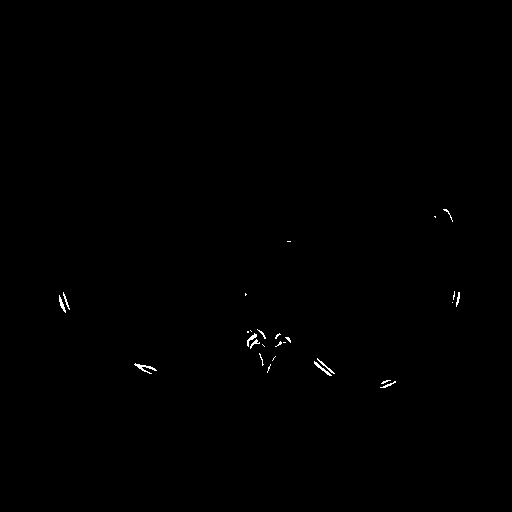

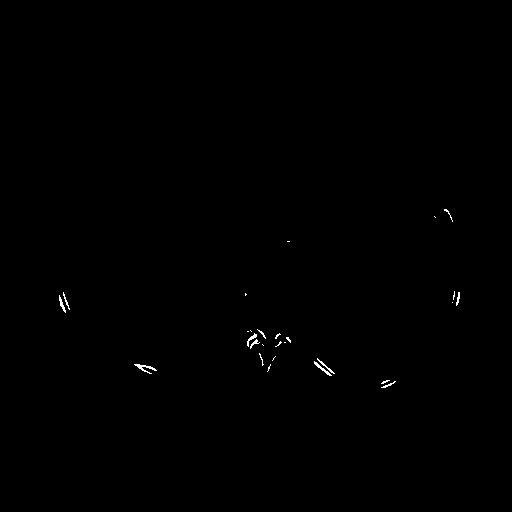

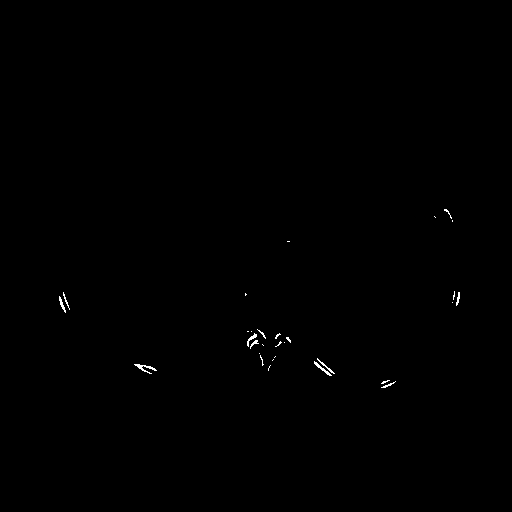

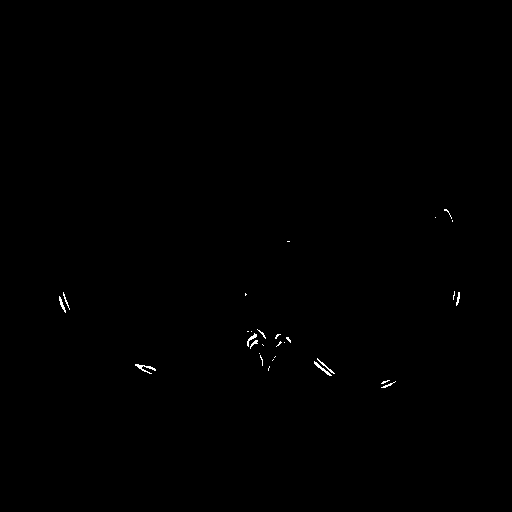

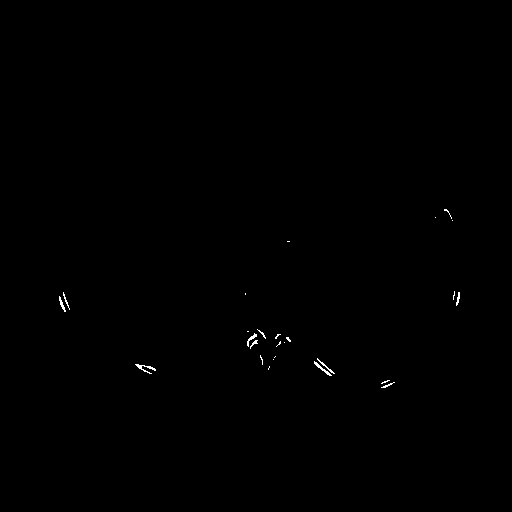

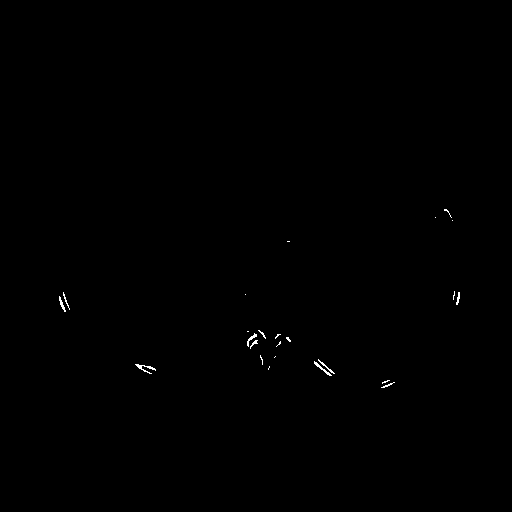

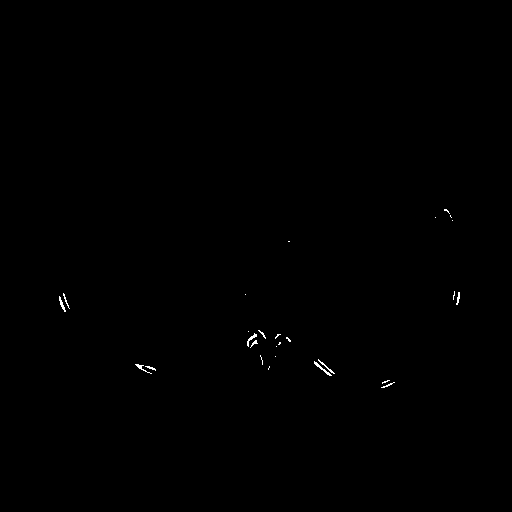

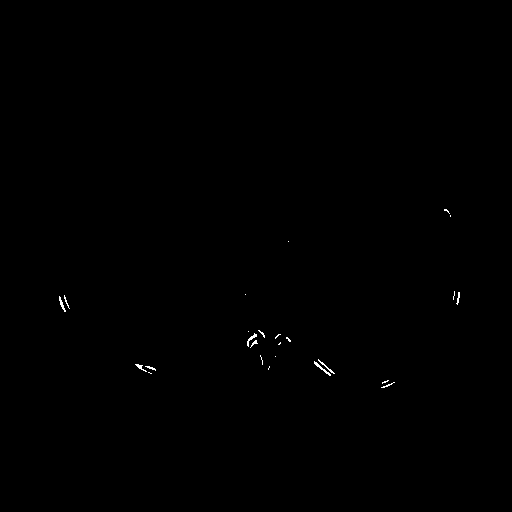

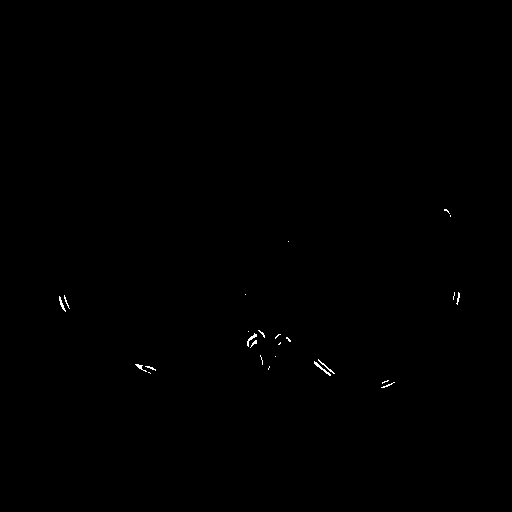

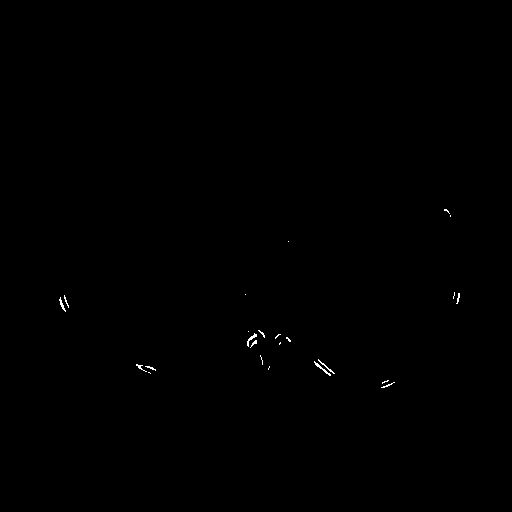

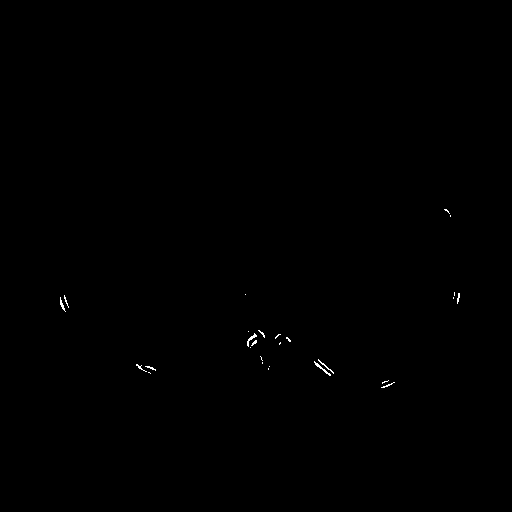

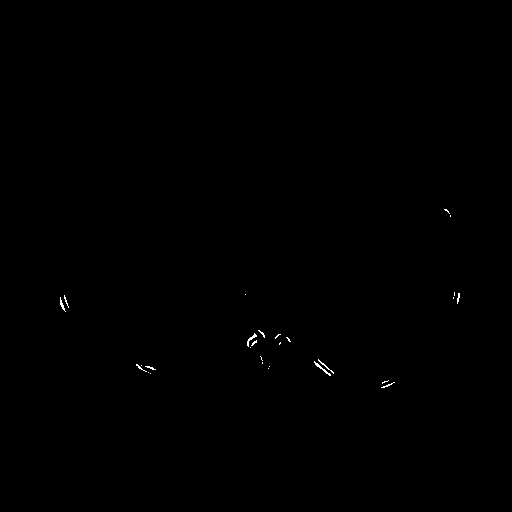

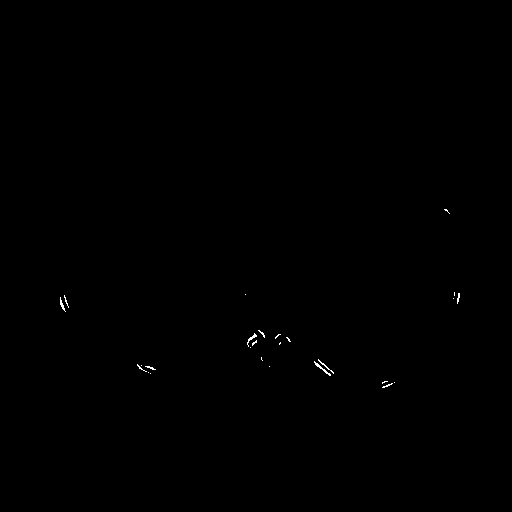

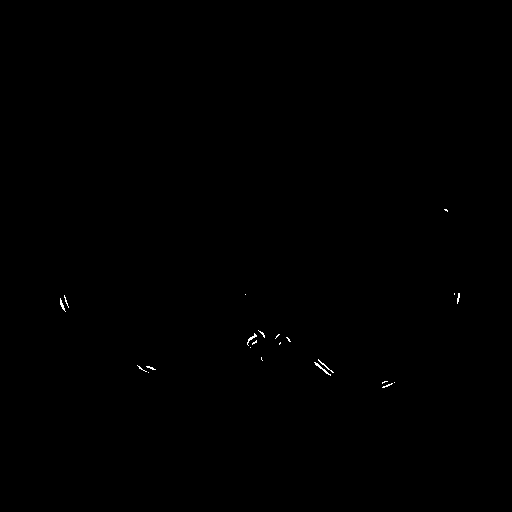

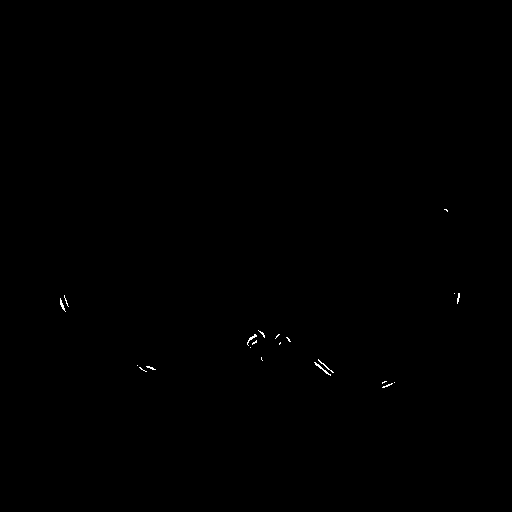

In [73]:
from PIL import Image
import matplotlib.pyplot as plt

for i in range(0, 500, 10) :
    Image.fromarray(read_dicom(path=target, window_width=512, window_level=i).astype('uint8')*255).show()

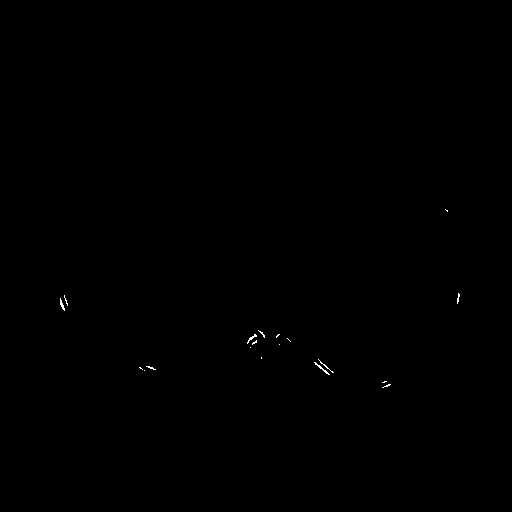

In [17]:
Image.fromarray(read_dicom(path=target, window_width=512, window_level=512)[..., 0].astype('uint8')*255)

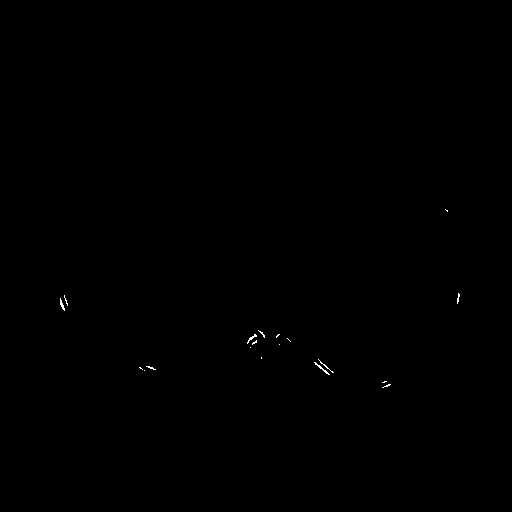

In [18]:
Image.fromarray(read_dicom(path=target, window_width=512, window_level=512)[..., 1].astype('uint8')*255)

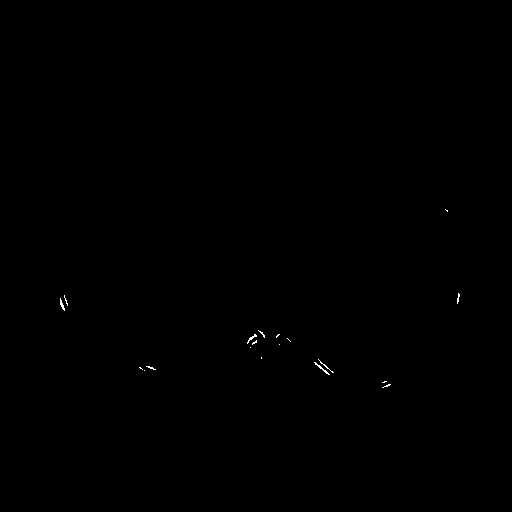

In [19]:
Image.fromarray(read_dicom(path=target, window_width=512, window_level=512)[..., 2].astype('uint8')*255)

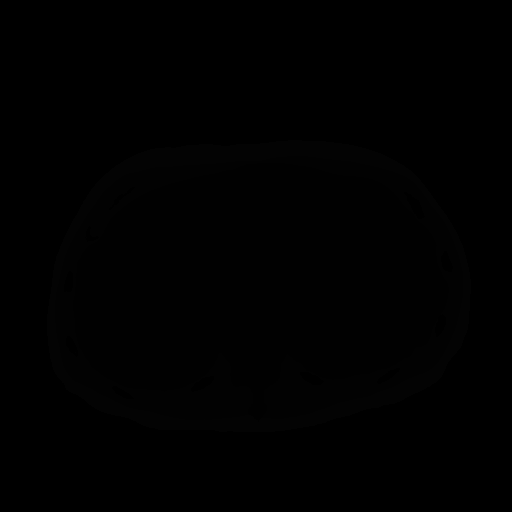

In [6]:
img = Image.open("./samples/train/label/case002.png").convert('L')
img

In [7]:
label = np.array(img)
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

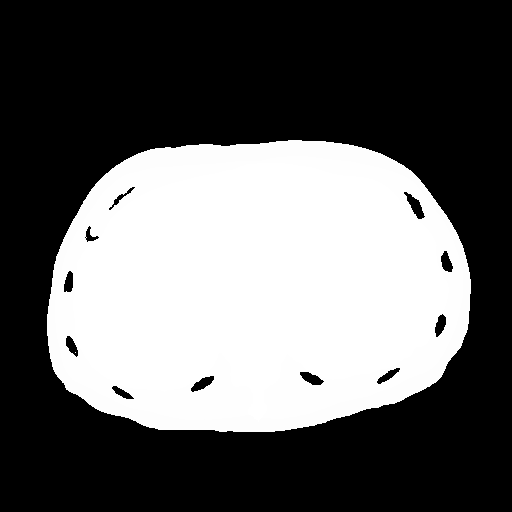

In [8]:
Image.fromarray(label * 255)